<a href="https://colab.research.google.com/github/davidsierra007/proyecto-04/blob/main/Proyecto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hola Juan! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Hola Juan! Buen avance pero hay una celda a la mitad de tu notebook que no compila. Recuerda que al momento de subir tu notebook a la plataforma de tripleten debes asegurarte de que el notebook completo compile sin errores.
    
Respecto a tu desarrollo, hay varios puntos corregir, pero para una primera revisión creo que es normal. Lee con atención los comentarios que dejé a lo largo del notebook y corrigelos según sea indicado.
    
Saludos!    

</div>

-----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ojo con este código, al momento de subirlo a la plataforma de tripleten el código debe poder ejecutarse correctamente. La celda anterior provoca un error, por lo que hay que borrarla o convertirla a tipo markdown o raw.

</div>

## Inicialización

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st
# Cargar todas las librerías



## Cargar datos

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

La data no carga inicialmente, agregué una celda con la carga correcta de información

</div>

In [5]:
users = pd.read_csv('/content/megaline_users.csv')
calls = pd.read_csv('/content/megaline_calls.csv')
messages = pd.read_csv('/content/megaline_messages.csv')
internet = pd.read_csv('/content/megaline_internet.csv')
plans = pd.read_csv('/content/megaline_plans.csv')


# Carga los archivos de datos en diferentes DataFrames


## Preparar los datos

In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [10]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


## Tarifas

In [11]:
print(plans.info())# Imprime la información general/resumida sobre el DataFrame de las tarifas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [12]:
plans.head()# Imprime una muestra de los datos para las tarifas



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Se puede observar dos tipos de planes basicos de telefonia celular, los cuales son: Surf y Ultimate. mas adelante iremos a trabajar con estos dos tipos de planes, los cules nos ofrecen distintos veneficios y al igual tienen un costo distindo.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, correcto con esta inspección de la data

</div>

## Corregir datos

In [13]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El dataset son solo dos registros, y a simple viste no se observa ningun registro duplicado y ausente.

## Enriquecer los datos

In [14]:
#Agregamos al Dataset la columna del costo por mb, ya que la facturacion se hace por mb.
plans['usd_per_mb'] = plans['usd_per_gb'] /1024
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,usd_per_mb
0,50,15360,500,20,10,0.03,0.03,surf,0.009766
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0.006836


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, pero no será necesario

</div>

## Usuarios/as

In [15]:
users.info()# Imprime la información general/resumida sobre el DataFrame de usuarios



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
users.head(5)# Imprime una muestra de datos para usuarios



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


El conjunto de datos users contiene información sobre los usuarios de Megaline. Incluye su ID de usuario único, nombre, edad, ciudad de residencia, el plan al que están suscritos y la fecha en que abandonaron (si lo hicieron).

### Corregir los datos

In [17]:
users = users.drop_duplicates()
users = users.dropna()
users.isna().sum()


,0
user_id,0
first_name,0
last_name,0
age,0
city,0
reg_date,0
plan,0
churn_date,0


### Enriquecer los datos

In [18]:
users = users.rename(columns={'plan': 'plan_name'})
users

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
84,1084,Wiley,Mckinney,21,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-06-04,surf,2018-11-11
94,1094,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12


In [19]:
users['churn_date'].fillna('active',inplace=True)



<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ojo con esta línea de código:
    
    users['churn_date'].fillna('active',inplace=True)
    
esto reemplaza los nulos por 'active'. Cuando usas el parámetro inplace=True, la función hace eso pero no devuelve nada. Si se usa el parámetro inplace=False, la función realiza el reemplazo de los nulos y devuelve un dataframe con ese reemplazo. Entonces en el código que tienes tú
    
    users = users['churn_date'].fillna('active',inplace=True)
    
estás asignando nada a la variable users (en el fondo le asignas un NoneType) y se pierde la información que contenía. Puedes hacer lo siguiente, no asignar nada al resultado:
    
    users['churn_date'].fillna('active',inplace=True)
    
o usar el parámetro inplace=False y asignar el resultado a users:
    
    users = users['churn_date'].fillna('active',inplace=False)

</div>

## Llamadas

In [20]:
calls.info()# Imprime la información general/resumida sobre el DataFrame de las llamadas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [21]:
calls.head(20)# Imprime una muestra de datos para las llamadas
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls
#con el codigo anterior convertimos las fechas al formato fechas.

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


El conjunto de datos calls contiene información sobre las llamadas realizadas por los usuarios de Megaline. Incluye el ID de la llamada, el ID del usuario que realizó la llamada, la fecha de la llamada y la duración de la llamada en minutos.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Te recomiendo convertir columna call_date a formato fecha
    

</div>

### Corregir los datos

In [22]:
calls.duplicated().sum() # estamos contando los valores duplicados

0

In [23]:
calls.isna().sum() # estamos contando los valores ausentes
calls['month'] = calls['call_date'].dt.month
calls['duration'] = np.ceil(calls['duration'])
calls

#

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,11
137731,1499_200,1499,2018-10-20,11.0,10
137732,1499_201,1499,2018-09-21,9.0,9
137733,1499_202,1499,2018-10-10,1.0,10


### Enriquecer los datos

No se observan valores ausentes ni duplicados en el dataset de calls.

<div class="alert alert-block alert-success">

> Añadir blockquote


<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok. Aunque aquí podrías haber redondeado hacia arriba la duración de las llamadas y creado la columna mes para después agrupar mensualmente las llamadas

</div>

## Mensajes

In [24]:
messages.info(5)# Imprime la información general/resumida sobre el DataFrame de los mensajes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [25]:
messages.head(5)# Imprime una muestra de datos para los mensajes



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


El conjunto de datos messages contiene información sobre los mensajes enviados por los usuarios de Megaline. Incluye el ID del mensaje, el ID del usuario que envió el mensaje y la fecha en que se envió el mensaje.

### Corregir los datos

In [26]:
messages.duplicated().sum()# estamos contando los valores duplicados

0

In [27]:
messages.isna().sum()# estamos contando los valores ausentes
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Te recomiendo convertir columna message_date a formato fecha
    

</div>

### Enriquecer los datos

In [28]:
messages= messages.rename(columns={'id':'messages'})
messages['month'] = messages['message_date'].dt.month
messages

,messages,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, aunque aquí podrías haber obtenido el mes de cada mensaje para después realizar la agrupación mensual

</div>

## Internet

In [29]:
internet.info(5)# Imprime la información general/resumida sobre el DataFrame de internet



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [30]:
internet.head(5)# Imprime una muestra de datos para el tráfico de internet
internet



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


El conjunto de datos internet contiene información sobre el uso de internet de los usuarios de Megaline. Incluye el ID de la sesión, el ID del usuario, la fecha de la sesión y la cantidad de datos utilizados en megabytes.

### Corregir los datos

In [31]:
internet.duplicated().sum()# estamos contando los valores duplicados
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month'] = internet['session_date'].dt.month
internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


In [32]:
internet.isna().sum()# estamos contando los valores ausentes

,0
id,0
user_id,0
session_date,0
mb_used,0
month,0


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Te recomiendo convertir columna session_date a formato fecha
    

</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

En esta parte, antes de empezar el estudio de tarifas, obten el mes de cada sesion de internet

</div>

### Enriquecer los datos

## Estudiar las condiciones de las tarifas

In [33]:
print(plans)# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras



   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   usd_per_mb  
0    0.009766  
1    0.006836  


In [34]:
calls_per_mt_user = calls.groupby(['user_id','month'])['id'].count().reset_index()
print(calls_per_mt_user)# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.



      user_id  month  id
0        1000     12  16
1        1001      8  27
2        1001      9  49
3        1001     10  65
4        1001     11  64
...       ...    ...  ..
2253     1498     12  39
2254     1499      9  41
2255     1499     10  53
2256     1499     11  45
2257     1499     12  65

[2258 rows x 3 columns]


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Aquí solo estás agrupando por usuario, debes agrupar por mes y por usuario para ver la cantidad de llamadas mensuales de cada usuario.

</div>


In [35]:
calls_per_mt_user = calls_per_mt_user.rename(columns={'id':'calls_per_mt'})
calls_per_mt_user

,user_id,month,calls_per_mt
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [36]:
minutes_per_mt_user = calls.groupby(['user_id','month'])['duration'].sum().reset_index()
print(minutes_per_mt_user)# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.



      user_id  month  duration
0        1000     12     124.0
1        1001      8     182.0
2        1001      9     315.0
3        1001     10     393.0
4        1001     11     426.0
...       ...    ...       ...
2253     1498     12     339.0
2254     1499      9     346.0
2255     1499     10     385.0
2256     1499     11     308.0
2257     1499     12     496.0

[2258 rows x 3 columns]


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

La duración de las llamadas se debe aproximar hacia arriba antes de agruparlas, recuerda que esa es la forma de cobro. Además, debes agrupar por usuario y por mes.

</div>


In [37]:
messages_per_mt_user = messages.groupby(['user_id','month'])['messages'].count().reset_index()
print(messages_per_mt_user)# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.



      user_id  month  messages
0        1000     12        11
1        1001      8        30
2        1001      9        44
3        1001     10        53
4        1001     11        36
...       ...    ...       ...
1801     1496      9        21
1802     1496     10        18
1803     1496     11        13
1804     1496     12        11
1805     1497     12        50

[1806 rows x 3 columns]


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Debes agrupar por usuario y por mes.

</div>


In [38]:
internet_per_mt_user = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
print(internet_per_mt_user)


      user_id  month   mb_used
0        1000     12   1901.47
1        1001      8   6919.15
2        1001      9  13314.82
3        1001     10  22330.49
4        1001     11  18504.30
...       ...    ...       ...
2272     1498     12  23137.69
2273     1499      9  12984.76
2274     1499     10  19492.43
2275     1499     11  16813.83
2276     1499     12  22059.21

[2277 rows x 3 columns]


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Debes agrupar por usuario y por mes.

</div>


In [39]:
merged_df = pd.merge(calls_per_mt_user, minutes_per_mt_user)
merged_df

,user_id,month,calls_per_mt,duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0
...,...,...,...,...
2253,1498,12,39,339.0
2254,1499,9,41,346.0
2255,1499,10,53,385.0
2256,1499,11,45,308.0


In [40]:
merged_df = pd.merge(merged_df, messages_per_mt_user)
merged_df

,user_id,month,calls_per_mt,duration,messages
0,1000,12,16,124.0,11
1,1001,8,27,182.0,30
2,1001,9,49,315.0,44
3,1001,10,65,393.0,53
4,1001,11,64,426.0,36
...,...,...,...,...,...
1768,1496,9,52,414.0,21
1769,1496,10,46,317.0,18
1770,1496,11,39,308.0,13
1771,1496,12,40,294.0,11


In [41]:
merged_df = pd.merge(merged_df, internet_per_mt_user)
merged_df

,user_id,month,calls_per_mt,duration,messages,mb_used
0,1000,12,16,124.0,11,1901.47
1,1001,8,27,182.0,30,6919.15
2,1001,9,49,315.0,44,13314.82
3,1001,10,65,393.0,53,22330.49
4,1001,11,64,426.0,36,18504.30
...,...,...,...,...,...,...
1754,1496,9,52,414.0,21,16389.27
1755,1496,10,46,317.0,18,14287.36
1756,1496,11,39,308.0,13,8547.36
1757,1496,12,40,294.0,11,16438.99


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Estos merges debes realizarlo por user_id y mes, ya que luego se usará para calcular el gasto mensual de cada usuario. Además, deben de ser de tipo outer, puesto que al realizarlos de tipo inner, podrías perder datos de usuarios que no están en ambos dataframes del merge. En el siguiente enlace hay una explicación visual de los tipos de merge: https://www.atlassian.com/data/sql/sql-join-types-explained-visually

</div>


In [42]:
merged_df = pd.merge(merged_df, users)
merged_df.head()

,user_id,month,calls_per_mt,duration,messages,mb_used,first_name,last_name,age,city,reg_date,plan_name,churn_date
0,1006,11,2,10.0,15,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
1,1006,12,9,59.0,139,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
2,1054,4,6,32.0,6,8231.44,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
3,1054,5,37,278.0,27,17925.98,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
4,1054,6,32,211.0,24,20824.09,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Esta celda tiene el error de que users no contiene nada (por lo que expliqué más arriba), por lo tanto, hay que corregir lo anterior para continuar.

</div>


In [43]:
revenue_per_mt_user = users.groupby('user_id')['plan_name'].sum()
print(revenue_per_mt_user)

user_id
1006    ultimate
1012        surf
1022        surf
1040        surf
1050    ultimate
1054        surf
1067        surf
1083        surf
1084        surf
1094        surf
1106        surf
1129        surf
1172        surf
1180        surf
1186    ultimate
1191    ultimate
1220        surf
1246    ultimate
1269    ultimate
1281        surf
1296    ultimate
1298        surf
1300        surf
1315        surf
1358        surf
1363    ultimate
1402        surf
1414        surf
1416        surf
1441    ultimate
1451    ultimate
1466        surf
1467    ultimate
1491        surf
Name: plan_name, dtype: object


In [57]:
def outcome_per_mt (df):
    messages_included_surf = plans.loc[0,'messages_included']
    messages_included_ultimate = plans.loc[1,'messages_included']
    mb_included_surf = plans.loc[0,'mb_per_month_included']
    mb_included_ultimate = plans.loc[1,'mb_per_month_included']
    duration_included_surf = plans.loc[0,'minutes_included']
    duration_included_ultimate = plans.loc[1,'minutes_included']
    df['price_plan'] = 0
    if df ['plan_name']=='surf':
      if df['messages'] > messages_included_surf:
       df['price_plan'] += (df['messages']-messages_included_surf) * 0.03
      elif df['duration'] > duration_included_surf:
        df['price_plan'] += (df['duration']-duration_included_surf) * 0.03
      elif df['mb_used'] > mb_included_surf: # Changed ['mb_used'] to df['mb_used']
        df['price_plan'] += (df['mb_used']-mb_included_surf) * 0.009766
    elif df ['plan_name'] =='ultimate':
      if df['messages'] > messages_included_ultimate:
       df['price_plan'] += (df['messages']-messages_included_ultimate) * 0.01
      elif df['duration'] > duration_included_ultimate:
        df['price_plan'] += (df['duration']-duration_included_ultimate) * 0.01
      elif df['mb_used'] > mb_included_ultimate: # Changed ['mb_used'] to df['mb_used']
        df['price_plan'] += (df['mb_used']-mb_included_ultimate) * 0.006836

    return df


merged_df = merged_df.apply(outcome_per_mt,axis=1)
merged_df

,user_id,month,calls_per_mt,duration,messages,mb_used,first_name,last_name,age,city,reg_date,plan_name,churn_date,price_plan
0,1006,11,2,10.0,15,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,0.000000
1,1006,12,9,59.0,139,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,9.562334
2,1054,4,6,32.0,6,8231.44,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31,0.000000
3,1054,5,37,278.0,27,17925.98,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31,25.059361
4,1054,6,32,211.0,24,20824.09,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31,53.362303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1491,8,54,382.0,50,10245.84,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18,0.000000
114,1491,9,52,414.0,50,7040.50,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18,0.000000
115,1491,10,75,585.0,51,8480.09,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18,0.030000
116,1491,11,46,409.0,46,5185.73,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18,0.000000


## Estudia el comportamiento de usuario

### Llamadas

In [45]:
merged_df

,user_id,month,calls_per_mt,duration,messages,mb_used,first_name,last_name,age,city,reg_date,plan_name,churn_date
0,1006,11,2,10.0,15,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
1,1006,12,9,59.0,139,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
2,1054,4,6,32.0,6,8231.44,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
3,1054,5,37,278.0,27,17925.98,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
4,1054,6,32,211.0,24,20824.09,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,1491,8,54,382.0,50,10245.84,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18
114,1491,9,52,414.0,50,7040.50,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18
115,1491,10,75,585.0,51,8480.09,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18
116,1491,11,46,409.0,46,5185.73,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18


In [46]:
calls_mean =  merged_df.groupby(['plan_name','month'])['duration'].mean().reset_index()


print(calls_mean)# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.



   plan_name  month    duration
0       surf      4   70.333333
1       surf      5  397.400000
2       surf      6  356.400000
3       surf      7  334.500000
4       surf      8  398.714286
5       surf      9  401.777778
6       surf     10  398.750000
7       surf     11  490.357143
8       surf     12  508.200000
9   ultimate      2  621.000000
10  ultimate      3  627.000000
11  ultimate      4  469.000000
12  ultimate      5  473.000000
13  ultimate      6  439.000000
14  ultimate      7  592.666667
15  ultimate      8  445.000000
16  ultimate      9  419.600000
17  ultimate     10  407.200000
18  ultimate     11  334.000000
19  ultimate     12  412.625000


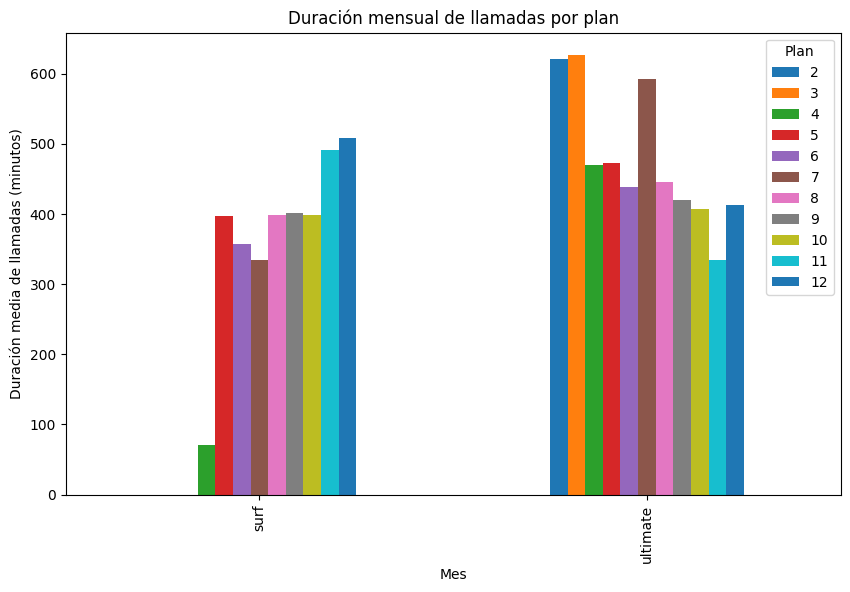

In [47]:

import matplotlib.pyplot as plt

calls_mean_grouped = calls_mean.groupby(['plan_name', 'month'])['duration'].mean().unstack()

calls_mean_grouped.plot(kind='bar', figsize=(10, 6))

plt.title('Duración mensual de llamadas por plan')
plt.xlabel('Mes')
plt.ylabel('Duración media de llamadas (minutos)')

plt.legend(title='Plan')

plt.show()


<Axes: >

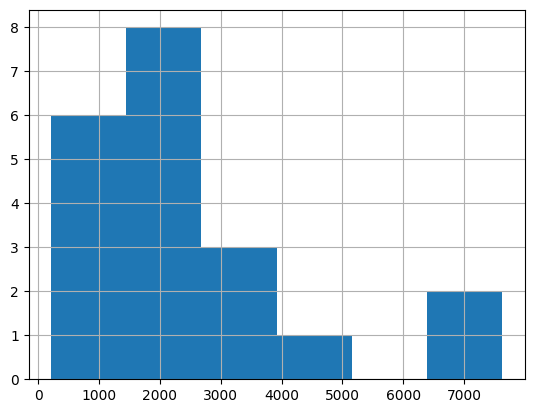

In [48]:
total_min_mes = merged_df.groupby(['plan_name','month'])['duration'].sum()
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
total_min_mes.hist(bins=6)


In [49]:
var_duration = merged_df.groupby('plan_name')['duration'].var()
mean_duration = merged_df.groupby('plan_name')['duration'].mean()

print(f'media es: {mean_duration} \n y la varianza es: {var_duration}')# Compara la duración promedio de llamadas por cada plan y por cada mes

media es: plan_name
surf        416.671053
ultimate    434.595238
Name: duration, dtype: float64 
 y la varianza es: plan_name
surf        42097.717018
ultimate    39040.441928
Name: duration, dtype: float64


In [50]:
total_min_mes = merged_df.groupby(['plan_name','month'])['duration'].mean()
total_min_mes# Calcula la media y la varianza de la duración mensual de llamadas.



plan_name  month
surf       4         70.333333
           5        397.400000
           6        356.400000
           7        334.500000
           8        398.714286
           9        401.777778
           10       398.750000
           11       490.357143
           12       508.200000
ultimate   2        621.000000
           3        627.000000
           4        469.000000
           5        473.000000
           6        439.000000
           7        592.666667
           8        445.000000
           9        419.600000
           10       407.200000
           11       334.000000
           12       412.625000
Name: duration, dtype: float64

In [51]:
var_total = total_min_mes.var()
media_total = total_min_mes.mean()

print(f'media es: {media_total} \n y la varianza es: {var_total}')

media es: 429.8262103174604 
 y la varianza es: 14370.625740151887


In [52]:
total_min_mes# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas



plan_name  month
surf       4         70.333333
           5        397.400000
           6        356.400000
           7        334.500000
           8        398.714286
           9        401.777778
           10       398.750000
           11       490.357143
           12       508.200000
ultimate   2        621.000000
           3        627.000000
           4        469.000000
           5        473.000000
           6        439.000000
           7        592.666667
           8        445.000000
           9        419.600000
           10       407.200000
           11       334.000000
           12       412.625000
Name: duration, dtype: float64

### Mensajes

In [53]:
var_duration = merged_df.groupby('plan_name')['messages'].var()
mean_duration = merged_df.groupby('plan_name')['messages'].mean()

print(f'media es: {mean_duration} \n y la varianza es: {var_duration}')# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan



media es: plan_name
surf        39.381579
ultimate    33.285714
Name: messages, dtype: float64 
 y la varianza es: plan_name
surf        715.359123
ultimate    710.745645
Name: messages, dtype: float64


In [54]:
var_duration = merged_df.groupby('plan_name')['mb_used'].var()
mean_duration = merged_df.groupby('plan_name')['mb_used'].mean()

print(f'media es: {mean_duration} \n y la varianza es: {var_duration}')# Compara la cantidad de tráfico de Internet consumido por usuarios por plan



media es: plan_name
surf        16146.084605
ultimate    15922.352619
Name: mb_used, dtype: float64 
 y la varianza es: plan_name
surf        6.098236e+07
ultimate    4.369336e+07
Name: mb_used, dtype: float64


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

### Internet

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [65]:
plan_surf = merged_df[merged_df['plan_name']=='surf']['price_plan']
plan_ultimate = merged_df[merged_df['plan_name']=='ultimate']['price_plan']

stat, p = st.ttest_ind(plan_surf, plan_ultimate)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05


if p < alpha:
    print('Rechazamos la hipótesis nula')
    print('Las medias son significativamente diferentes')
else:
    print("No podemos rechazar la hipótesis nula")


stat=3.065, p=0.003
Rechazamos la hipótesis nula
Las medias son significativamente diferentes


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis



## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]